# Chapter 03 그리디(Greedy)

### <1> 당장 좋은 것만 선택하는 그리디

그리디 알고리즘은 단순하지만 강력한 문제 해결 방법으로, 탐욕법이라고도 한다.

탐욕적이라는 말은 **'현재 상황에서 지금 당장 좋은 것만 고르는 방법'**이다.

다익스트라 알고리즘, 플로이드 워셜과 같은 특정 알고리즘을 미리 알고 있거든 준비해야 최단 경로를 빠르게 찾을 수 있는 문제도 있다.

다익스트라 알고리즘은 밀히 말하면 그리디 알고리즘으로 분류되며, 이런 특이 케이스를 제외하고는 단순 암기를 통해 모든 문제를 대처하기 어렵다.

#### 예제 3-1 거스름돈

당신은 음식점의 계산을 도와주는 점원이다. 카운터에는 거스름돈으로 사용할 500원, 100원, 50원, 10원짜리 동전이 무한히 존재한다고 가정한다. 손님에게 거슬러 줘야 할 돈이 N원일 때 거스러 줘야 할 동전의 최소 개수를 구하라. 단, 거슬러 줘야 할 돈 N은 항상 10의 배수이다.

*문제 해설*

이 문제는 그리디의 대표 문제로, 간단하다. **가장 큰 화폐 단위부터** 돈을 거슬러 주는 것이다.

N = 1260 이라면 어떻게 해결할 수 있는가?

In [2]:
n = 1260

count = 0

# 큰 단위의 화폐부터 차례대로 확인
coin_types = [500, 100, 50, 10]

for coin in coin_types :
    count += n // coin # 해당 화폐로 거슬러 줄 수 있는 동전의 개수 세기
    n %= coin
    
print(count)

6


#### 그리디 알고리즘의 정당성

그리디 알고리즘으로 문제의 해법을 찾았을 때는 그 해법이 정당한지 검토해야 한다.

거스름돈 문제를 그리디 알고리즘으로 해결할 수 있는 이유는 가지고 있는 동전 중에서 큰 단위가 항상 작은 단위의 배수이므로 작은 단위의 동전들을 종합해 다른 해가 나올 수 없기 때문이다.

### <2> 큰 수의 법칙

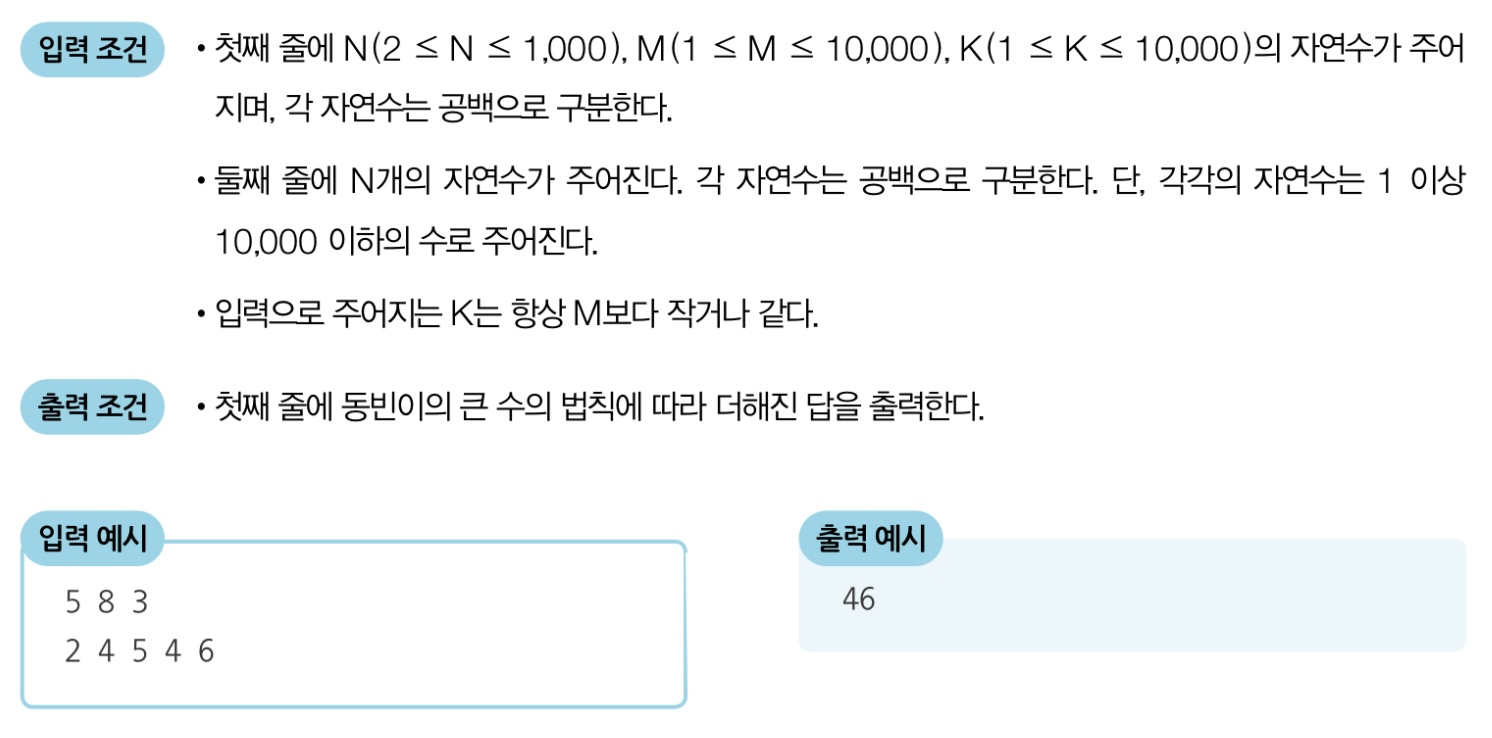

In [3]:
n, m, k = map(int, input().split)
data = list(map(int, input().split))

data = data.sort()

maximum_num = data[n-1]

count = 0
num = 0

for i in range(count, m):
    for j in range(k):
        num += maximum_num
        count += k
    maximum_num = data[n-2]
    
print(num)

5 8 3


TypeError: 'builtin_function_or_method' object is not iterable

In [2]:
# N, M, K를 공백으로 구분하여 입력받기
n, m, k = map(int, input().split())
# N개의 수를 공백으로 구분하여 입력받기
data = list(map(int, input().split()))

data.sort() # 입력받은 수들 정렬하기
first = data[n - 1] # 가장 큰 수
second = data[n - 2] # 두 번째로 큰 수

result = 0

while True:
    for i in range(k): # 가장 큰 수를 K번 더하기
        if m == 0: # m이 0이라면 반복문 탈출
            break
        result += first
        m -= 1 # 더할 때마다 1씩 빼기
    if m == 0: # m이 0이라면 반복문 탈출
        break
    result += second # 두 번째로 큰 수를 한 번 더하기
    m -= 1 # 더할 때마다 1씩 빼기
    
print(result) # 최종 답안 출력

5 8 3
2 4 5 4 6
46


In [6]:
# N, M, K를 공백으로 구분하여 입력받기
n, m, k = map(int, input().split())
# N개의 수를 공백으로 구분하여 입력받기
data = list(map(int, input().split()))

data.sort() # 입력받은 수들 정렬하기
first = data[n - 1] # 가장 큰 수
second = data[n - 2] # 두 번째로 큰 수

# 가장 큰 수가 더해지는 횟수 계산
count = int(m / (k + 1)) * k
count += m % (k + 1) ## m이 K+1 로 딱 떨어지게 나눠지지 않을 경우 나머지 더해줌

result = 0
result += (count) * first # 가장 큰 수 더하기
result += (m - count) * second # 두 번째로 큰 수 더하기

print(result)

5 8 7
2 4 5 4 6
47


### <3> 숫자 카드 게임

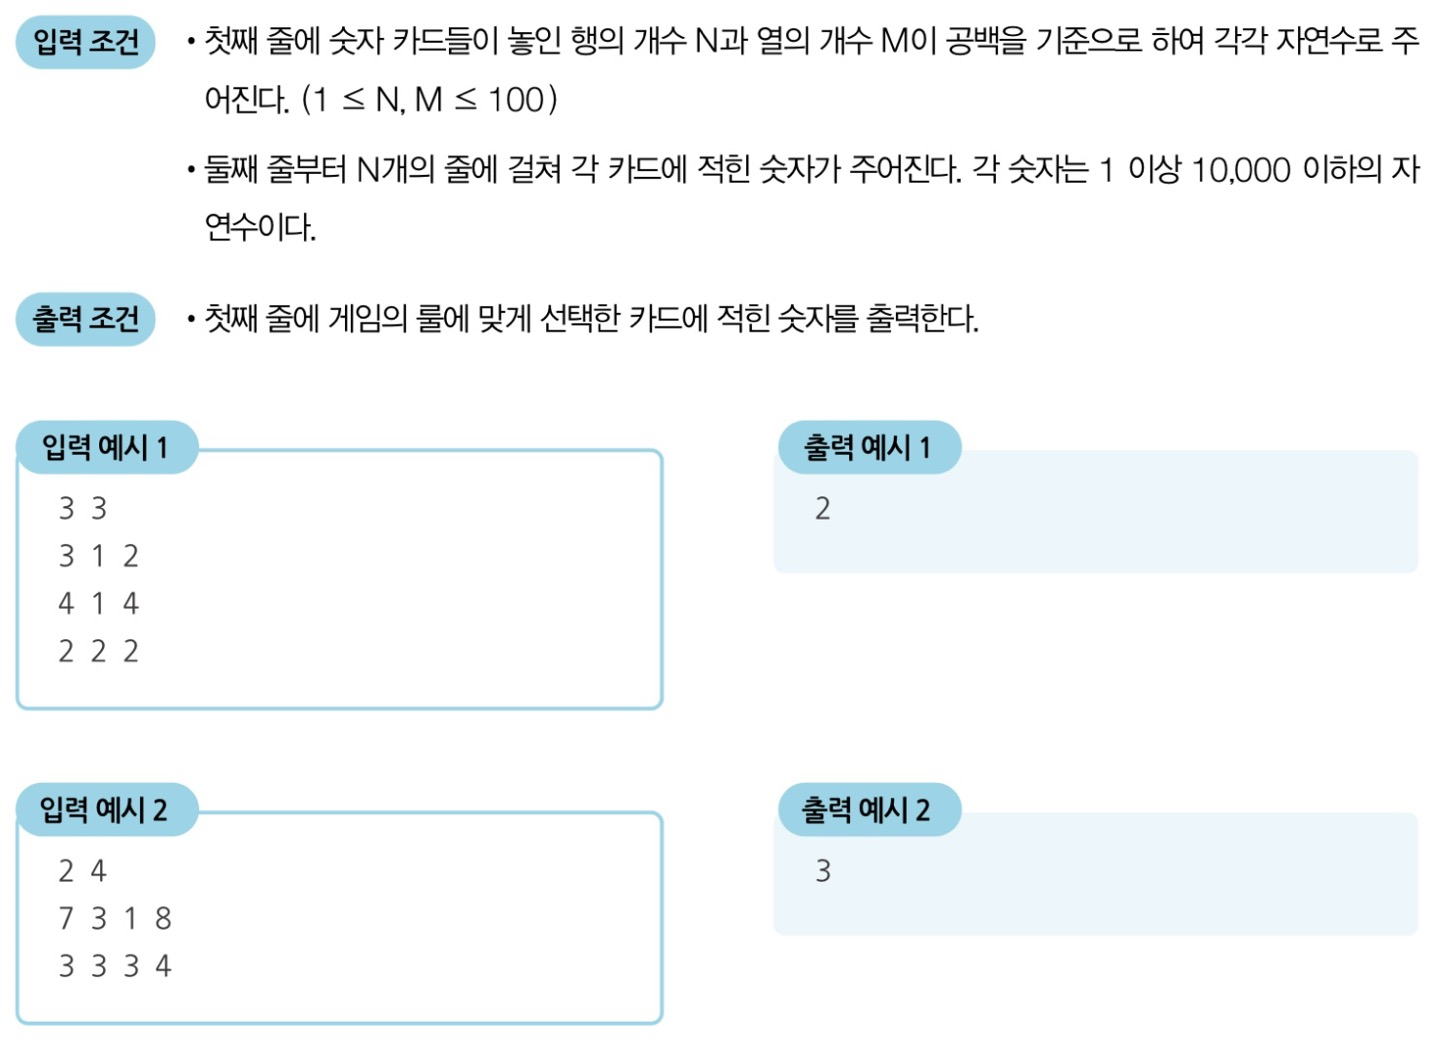

#### 내가 푼 답

In [16]:
n, m = map(int, input().split())

data = []

for i in range(n):
    data += [list(map(int, input().split()))]
    
result = 0

for i in range(n):
    data[i].sort()
    if result < data[i][0]:
        result = data[i][0]
        
print(result)

2 4
7 3 1 8
3 3 3 4
3


In [18]:
n, m = map(int, input().split())

data = []
result = 0

for i in range(n):
    data += [list(map(int, input().split()))]
    data[i].sort()
    if result < data[i][0]:
        result = data[i][0]
        
print(result)

3 3
3 1 52
4 1 4
2 2 2
2


#### 책 답

In [19]:
# N, M을 공백으로 구분하여 입력받기
n, m = map(int, input().split())

result = 0
# 한 줄씩 입력받아 확인
for i in range(n):
    data = list(map(int, input().split()))
    # 현재 줄에서 '가장 작은 수' 찾기
    min_value = min(data)
    # '가장 작은 수'들 중에서 가장 큰 수 찾기
    result = max(result, min_value)
    
print(result) # 최종 답안 출력

3 3
3 1 2
4 1 4
2 2 2
2


### <3> 1이 될 때까지

#### 내가 푼 답

In [28]:
n, k = map(int, input().split())

count = 0

while n != 1:
    if n % k == 0:
        n /= k
        count += 1
    else:
        n -= 1
        count += 1
        
print(count)

6501 6
14


#### 책 답

In [27]:
# N, K를 공백으로 구분하여 입력받기
n, k = map(int, input().split())
result = 0

while True:
    # (N == K로 나누어떨어지는 수)가 될 때까지 1씩 빼기
    target = (n // k) * k
    result += (n - target)
    n = target
    # N이 K보다 작을 때(더 이상 나눌 수 없을 때) 반복문 탈출
    if n < k:
        break
    # K로 나누기
    result += 1
    n //= k
    
# 마지막으로 남은 수에 대하여 1씩 빼기
result += (n - 1)
print(result)

6501 6
14
